In [1]:
import numpy as np
import serial.tools.list_ports
import serial
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

KeyboardInterrupt: 

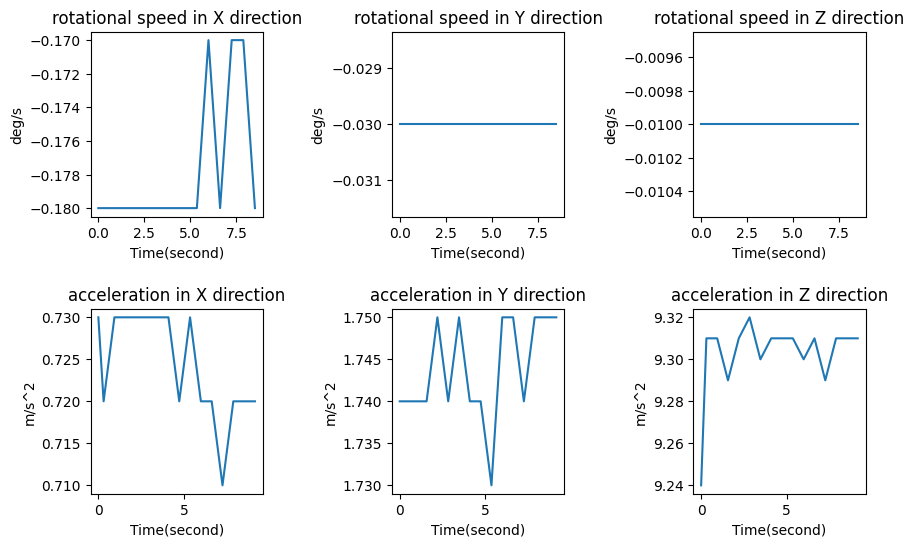

In [2]:
x_data = []


acc_data = []
v_data = []

vx_data = []
vy_data = []
vz_data = []

accx_data = []
accy_data = []
accz_data = []

serialInst = serial.Serial()
serialInst.baudrate = 9600
serialInst.port = 'COM6'
serialInst.open()

fig, axs = plt.subplots(2, 3, figsize=(10, 6))

vx, = axs[0, 0].plot(x_data , vx_data)
vy, = axs[0, 1].plot(x_data , vy_data)
vz, = axs[0, 2].plot(x_data , vz_data)
ax, = axs[1, 0].plot(x_data , accx_data)
ay, = axs[1, 1].plot(x_data , accy_data)
az, = axs[1, 2].plot(x_data , accz_data)
axs[0, 0].set_title('rotational speed in X direction')
axs[0, 1].set_title('rotational speed in Y direction')
axs[0, 2].set_title('rotational speed in Z direction')
axs[1, 0].set_title('acceleration in X direction')
axs[1, 1].set_title('acceleration in Y direction')
axs[1, 2].set_title('acceleration in Z direction')

axs[0, 0].set_xlabel('Time(second)')
axs[0, 1].set_xlabel('Time(second)')
axs[0, 2].set_xlabel('Time(second)')
axs[1, 0].set_xlabel('Time(second)')
axs[1, 1].set_xlabel('Time(second)')
axs[1, 2].set_xlabel('Time(second)')

axs[0, 0].set_ylabel('deg/s')
axs[0, 1].set_ylabel('deg/s')
axs[0, 2].set_ylabel('deg/s')
axs[1, 0].set_ylabel('m/s^2')
axs[1, 1].set_ylabel('m/s^2')
axs[1, 2].set_ylabel('m/s^2')

plt.subplots_adjust(wspace=0.75)

plt.subplots_adjust(hspace=0.5)

x_data.append([0.0])
i = 1
k =0
while True:
    

    try:
        data = serialInst.readline().decode('utf-8').strip()
        data = data.replace("Accelerometer (m/s^2): ", "").replace("Gyroscope (deg/s): ", "").replace("Time: ", "")
        data = data.split(",")
        print(data)
        if (i == 1):
            acc_data.append(data)

        elif (i == 2):
            v_data.append(data)


        elif (i == 3):
            x_data.append(data)

            i = i-3
        
    except:
        print('data was not recorded')
        i = i-1
    acc_data_ar = np.array(acc_data).astype('float')
    v_data_ar = np.array(v_data).astype('float')
    x_data_ar = np.array(x_data).astype('float')
    
    if (k>=3 and acc_data_ar[:,0].size== x_data_ar[:,0].size):
            ax.set_data(x_data_ar[:,0]/1000, acc_data_ar[:,0])
            ay.set_data(x_data_ar[:,0]/1000, acc_data_ar[:,1])
            az.set_data(x_data_ar[:,0]/1000, acc_data_ar[:,2])
            axs[1, 0].relim()
            axs[1, 0].autoscale_view()  
            axs[1, 1].relim()
            axs[1, 1].autoscale_view()  
            axs[1, 2].relim()
            axs[1, 2].autoscale_view()    
            display(fig)
            clear_output(wait=True)  # Clear the previous plot to update it
            time.sleep(0.5)
            print("Updating plot...")
    if (k>=3 and v_data_ar[:,0].size== x_data_ar[:,0].size):
            vx.set_data(x_data_ar[:,0]/1000, v_data_ar[:,0])
            vy.set_data(x_data_ar[:,0]/1000, v_data_ar[:,1])
            vz.set_data(x_data_ar[:,0]/1000, v_data_ar[:,2])
            axs[0, 0].relim()
            axs[0, 0].autoscale_view()  
            axs[0, 1].relim()
            axs[0, 1].autoscale_view()  
            axs[0, 2].relim()
            axs[0, 2].autoscale_view()  
    
            display(fig)
            clear_output(wait=True)  # Clear the previous plot to update it
            time.sleep(0.5)
            print("Updating plot...")
        
    k = k+1
    i =i +1
    


In [10]:
acc_data_ar

array([[-0.18, -0.03, -0.02]])

In [215]:
(x_data_ar[:,0])

array([    0.,   307.,   947.,  1577.,  2209.,  2841.,  3473.,  4106.,
        4738.,  5369.,  6001.,  6634.,  7266.,  7898.,  8529.,  9162.,
        9794., 10426., 11059., 11693., 12325., 12958., 13591., 14225.,
       14858., 15491., 16123., 16757., 17390., 18023., 18656., 19290.,
       19922., 20555.])

array([  307.,   947.,  1577.,  2209.,  2841.,  3473.,  4104.,  4734.,
        5367.,  5997.,  6630.,  7262.,  7894.,  8525.,  9157.,  9790.,
       10422., 11055., 11687., 12321., 12954., 13587., 14220., 14854.,
       15486., 16119., 16753., 17386., 18019., 18652., 19286., 19918.,
       20551., 21183., 21816., 22449., 23081., 23714., 24348., 24981.,
       25614., 26247., 26881., 27513., 28146., 28779., 29413., 30046.,
       30679., 31311., 31945., 32578., 33211., 33844., 34478., 35110.,
       35743., 36376., 37010., 37643., 38276., 38908., 39542., 40175.,
       40808., 41441., 42075., 42707., 43340., 43973., 44607., 45240.,
       45873., 46505.])

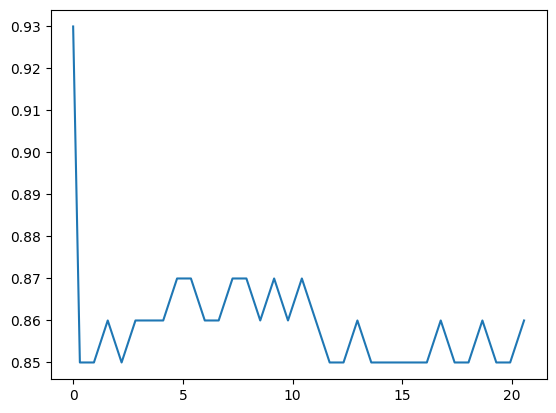

In [216]:
plt.plot((x_data_ar[:,0]/1000),acc_data_ar[:,0])

In [68]:
acc_data = [[float(value) for value in sublist] for sublist in acc_data]
acc_data = np.array(acc_data)
v_data = [[float(value) for value in sublist] for sublist in v_data]
v_data = np.array(v_data)
x_data = [[float(value) for value in sublist] for sublist in x_data]
x_data = np.array(x_data)

In [16]:
    for value in range(len(x_data)):
        vx_data.append(v_data[value][0])
        
    for value in range(len(x_data)):
        vy_data.append(v_data[value][1])

    for value in range(len(x_data)):
        vz_data.append(v_data[value][2])
        
    for value in range(len(x_data)):
        accx_data.append(acc_data[value][0])
        
    for value in range(len(x_data)):
        accy_data.append(acc_data[value][1])

    for value in range(len(x_data)):
        accz_data.append(acc_data[value][2])

Text(0.5, 1.0, 'acceleration in Z direction')

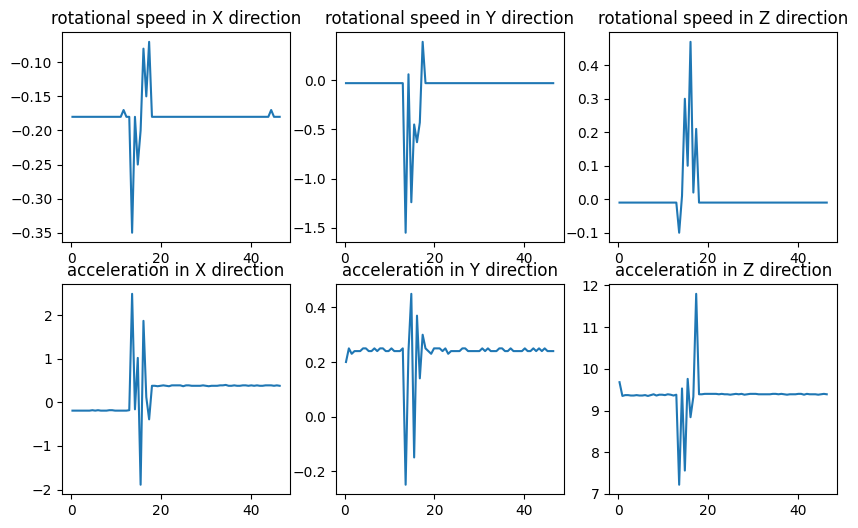

In [17]:
    fig, axs = plt.subplots(2, 3, figsize=(10, 6))

    axs[0, 0].plot(x_data/1000 , vx_data)
    axs[0, 1].plot(x_data/1000 , vy_data)
    axs[0, 2].plot(x_data/1000 , vz_data)
    axs[1, 0].plot(x_data/1000 , accx_data)
    axs[1, 1].plot(x_data/1000 , accy_data)
    axs[1, 2].plot(x_data/1000 , accz_data)
    axs[0, 0].set_title('rotational speed in X direction')
    axs[0, 1].set_title('rotational speed in Y direction')
    axs[0, 2].set_title('rotational speed in Z direction')
    axs[1, 0].set_title('acceleration in X direction')
    axs[1, 1].set_title('acceleration in Y direction')
    axs[1, 2].set_title('acceleration in Z direction')

C:\Users\Erfan\AppData\Local\Temp\ipykernel_21912\3351606041.py:42: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, interval=10)
C:\Users\Erfan\.conda\envs\numpy_files\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


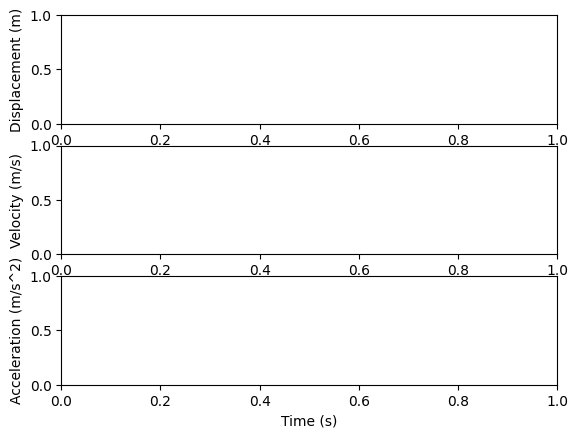

In [18]:
# Create the plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
x_data = []
y1_data = []
y2_data = []
y3_data = []
ax1.set_ylabel('Displacement (m)')
ax2.set_ylabel('Velocity (m/s)')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.set_xlabel('Time (s)')

# Define the update function for the animation
def update(frame):
    # Read the serial data
    data = ser.readline().decode().strip().split(',')
    if len(data) == 6:
        ax = float(data[0])
        ay = float(data[1])
        az = float(data[2])
        vx = float(data[3])
        vy = float(data[4])
        vz = float(data[5])
        
        # Append the data to the plot arrays
        x_data.append(frame)
        y1_data.append(ax)
        y2_data.append(vx)
        y3_data.append(az)

        # Update the plot
        ax1.clear()
        ax1.plot(x_data, y1_data)
        ax2.clear()
        ax2.plot(x_data, y2_data)
        ax3.clear()
        ax3.plot(x_data, y3_data)
        
    else:
        print('Invalid data:', data)

# Start the animation
ani = FuncAnimation(fig, update, interval=10)

# Show the plot
plt.show()

In [8]:
acc_data = [[float(value) for value in sublist] for sublist in acc_data]
acc_data = np.array(acc_data)





In [36]:
acc_data[:][0]

array([-0.19,  0.2 ,  9.68])

In [13]:
x_data

[]

In [222]:
x_data = []


acc_data = []
v_data = []

vx_data = []
vy_data = []
vz_data = []

accx_data = []
accy_data = []
accz_data = []

serialInst = serial.Serial()
serialInst.baudrate = 9600
serialInst.port = 'COM6'
serialInst.open()

fig, axs = plt.subplots()

line, = axs.plot(x_data , vx_data)
x_data.append([0])
i = 0
k =0

while k <= 100:
    try:
        data = serialInst.readline().decode('utf-8').strip()
        data = data.replace("Accelerometer (m/s^2): ", "").replace("Gyroscope (deg/s): ", "").replace("Time: ", "")
        data = data.split(",")
        print(data)

        if i == 1:
            acc_data.append(data)
        elif i == 2:
            v_data.append(data)
        elif i == 3:
            x_data.append(data)
            i = i - 3

    except Exception as e:
        print('Error:', e)
        i = i - 1

    acc_data_ar = np.array(acc_data).astype('float')
    v_data_ar = np.array(v_data).astype('float')
    x_data_ar = np.array(x_data).astype('float')

    if k >= 3 and acc_data_ar[:, 0].size == x_data_ar[:, 0].size:
        line.set_data(x_data_ar[:, 0] / 1000, acc_data_ar[:, 0])
        axs.relim()
        axs.autoscale_view()

        print("Updating plot...")

    plt.pause(0.01)  # Refresh the plot

    k = k + 1
    i = i + 1

plt.show()  # Keep the plot window open


SyntaxError: invalid non-printable character U+00A0 (157562907.py, line 28)

In [ ]:
x_data = []
acc_data = []
v_data = []

vx_data = []
vy_data = []
vz_data = []

accx_data = []
accy_data = []
accz_data = []

serialInst = serial.Serial()
serialInst.baudrate = 9600
serialInst.port = 'COM6'
serialInst.open()

fig, axs = plt.subplots(2, 3, figsize=(10, 6))

line, = axs[0, 0].plot(x_data , vx_data)
axs[0, 1].plot(x_data , vy_data)
axs[0, 2].plot(x_data , vz_data)
axs[1, 0].plot(x_data , accx_data)
axs[1, 1].plot(x_data , accy_data)
axs[1, 2].plot(x_data , accz_data)
axs[0, 0].set_title('rotational speed in X direction')
axs[0, 1].set_title('rotational speed in Y direction')
axs[0, 2].set_title('rotational speed in Z direction')
axs[1, 0].set_title('acceleration in X direction')
axs[1, 1].set_title('acceleration in Y direction')
axs[1, 2].set_title('acceleration in Z direction')

i = 0
k =0
while (k <=222):

    try:
        data = serialInst.readline().decode('utf-8').strip()
        data = data.replace("Accelerometer (m/s^2): ", "").replace("Gyroscope (deg/s): ", "").replace("Time: ", "")
        data = data.split(",")
        print(data)
        if (i == 1):
            acc_data.append(data)

        elif (i == 2):
            v_data.append(data)


        elif (i == 3):
            x_data.append(data)

            i = i-3
        acc_data_ar = np.array(acc_data).astype('float')
        v_data_ar = np.array(v_data).astype('float')
        x_data_ar = np.array(x_data).astype('float')


    # Pause to allow the plot to update
        plt.pause(0.01)
        
    except:
        print('data was not recorded')
        i = i-1

    line.set_data(x_data_ar/1000, acc_data_ar)
    axs.relim()
    axs.autoscale_view()
        

        
    k = k+1
    i =i +1

In [ ]:
x_data = []


acc_data = []
v_data = []

vx_data = []
vy_data = []
vz_data = []

accx_data = []
accy_data = []
accz_data = []

serialInst = serial.Serial()
serialInst.baudrate = 9600
serialInst.port = 'COM6'
serialInst.open()

fig, axs = plt.subplots()

line, = axs.plot(x_data , vx_data)
x_data.append([0])
i = 0
k =0
while (k <=100):

    try:
        data = serialInst.readline().decode('utf-8').strip()
        data = data.replace("Accelerometer (m/s^2): ", "").replace("Gyroscope (deg/s): ", "").replace("Time: ", "")
        data = data.split(",")
        print(data)
        if (i == 1):
            acc_data.append(data)

        elif (i == 2):
            v_data.append(data)


        elif (i == 3):
            x_data.append(data)

            i = i-3
        
    except:
        print('data was not recorded')
        i = i-1
    acc_data_ar = np.array(acc_data).astype('float')
    v_data_ar = np.array(v_data).astype('float')
    x_data_ar = np.array(x_data).astype('float')
    
    if (k>=3 and acc_data_ar[:,0].size== x_data_ar[:,0].size):
            line.set_data(x_data_ar[:,0]/1000, acc_data_ar[:,0])
            axs.relim()
            axs.autoscale_view()  
            display(fig)
            clear_output(wait=True)  # Clear the previous plot to update it
            time.sleep(0.5)
            print("Updating plot...")
            

        
    k = k+1
    i =i +1
    
